# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build partial query URL
city_query_url = f"{url}appid={weather_api_key}&units=imperial&q="

City_ID_list = []
Weather_list = []


for city in cities:
    
    response = requests.get(city_query_url + city).json()
    
    try:
        City_ID = response['id']
        City_ID_list.append(City_ID)
    except KeyError:
        City_ID_list.append('NA')
    
    try:
        Weather = response['weather'][0]['main']
        Weather_list.append(Weather)
        
    except KeyError:
        Weather_list.append('NA')

In [4]:
weather_dict = {
    'City ID': City_ID_list,
    'City': cities,
    'Weather': Weather_list
}
weather_data_pd = pd.DataFrame(weather_dict)
weather_data_pd

City ID            City Weather
0    2980080  saint-francois  Clouds
1    5546220    saint george   Clear
2         NA   belushya guba      NA
3    2163355          hobart    Rain
4    1006984     east london   Clear
..       ...             ...     ...
599  3038789       abbeville  Clouds
600  2349431           sabla  Clouds
601  5919850         chapais  Clouds
602  2647984  great yarmouth  Clouds
603  3466980       caravelas  Clouds

[604 rows x 3 columns]

In [5]:
clean_weather_data = weather_data_pd[weather_data_pd.Weather !="NA"]
clean_weather_data

City ID            City Weather
0    2980080  saint-francois  Clouds
1    5546220    saint george   Clear
3    2163355          hobart    Rain
4    1006984     east london   Clear
5    5855927            hilo   Clear
..       ...             ...     ...
599  3038789       abbeville  Clouds
600  2349431           sabla  Clouds
601  5919850         chapais  Clouds
602  2647984  great yarmouth  Clouds
603  3466980       caravelas  Clouds

[560 rows x 3 columns]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
"""response = requests.get(city_query_url + city).json()

print(response)

City_name = response['name']
City_lat = response['coord']['lat']
City_lng = response['coord']['lon']
City_mtemp = response['main']['temp_max']
City_humid = response['main']['humidity']
City_cloud = response['clouds']['all']
City_winds = response['wind']['speed']
City_country = response['sys']['country']
City_date = response['dt']"""

{'coord': {'lon': 141.29, 'lat': -6.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.72, 'feels_like': 80.38, 'temp_min': 72.72, 'temp_max': 72.72, 'pressure': 1012, 'humidity': 98, 'sea_level': 1012, 'grnd_level': 1008}, 'wind': {'speed': 1.9, 'deg': 142}, 'clouds': {'all': 96}, 'dt': 1592506758, 'sys': {'country': 'PG', 'sunrise': 1592512991, 'sunset': 1592555350}, 'timezone': 36000, 'id': 2093846, 'name': 'Kiunga', 'cod': 200}


In [36]:
"""city_dict = {
    'City': City_name,
    'Lat': City_lat,
    'Lng': City_lng,
    'Max Temp': City_mtemp,
    'Humidity': City_humid,
    'Cloudiness': City_cloud,
    'Wind Speed': City_winds,
    'Country': City_country,
    'Date': City_date
}

print(city_dict)"""

{'City': 'Kiunga', 'Lat': -6.12, 'Lng': 141.29, 'Max Temp': 72.72, 'Humidity': 98, 'Cloudiness': 96, 'Wind Speed': 1.9, 'Country': 'PG', 'Date': 1592506758}


In [6]:
City_name_list = []
City_lat_list = []
City_lng_list = []
City_mtemp_list = []
City_humid_list = []
City_cloud_list = []
City_winds_list = []
City_country_list = []
City_date_list = []

for city in cities:
    response = requests.get(city_query_url + city).json()
    
    try:
        City_name = response['name']
        City_name_list.append(City_name)
    except KeyError:
        City_name_list.append("NA")
    
    try:
        City_lat = response['coord']['lat']
        City_lat_list.append(City_lat)
    except KeyError:
        City_lat_list.append(0)
    
    try:
        City_lng = response['coord']['lon']
        City_lng_list.append(City_lng)
    except KeyError:
        City_lng_list.append(0)
        
    try:
        City_mtemp = response['main']['temp_max']
        City_mtemp_list.append(City_mtemp)
    except KeyError:
        City_mtemp_list.append(0)
        
    try:
        City_humid = response['main']['humidity']
        City_humid_list.append(City_humid)
    except KeyError:
        City_humid_list.append(0)
        
    try:
        City_cloud = response['clouds']['all']
        City_cloud_list.append(City_humid)
    except KeyError:
        City_cloud_list.append(0)
        
    try:
        City_winds = response['wind']['speed']
        City_winds_list.append(City_winds)
    except KeyError:
        City_winds_list.append(0)
        
    try:
        City_country = response['sys']['country']
        City_country_list.append(City_country)
    except KeyError:
        City_country_list.append("NA")
        
    try:
        City_date = response['dt']
        City_date_list.append(City_date)
    except KeyError:
        City_date_list.append(0)

In [8]:
full_city_dict = {
    'City': City_name_list,
    'Lat': City_lat_list,
    'Lng': City_lng_list,
    'Max Temp': City_mtemp_list,
    'Humidity': City_humid_list,
    'Cloudiness': City_cloud_list,
    'Wind Speed': City_winds_list,
    'Country': City_country_list,
    'Date': City_date_list
}

full_city_data_pd = pd.DataFrame(full_city_dict)

clean_full_city_data = full_city_data_pd[full_city_data_pd.City != "NA"]
clean_full_city_data

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0    Saint-François  46.42    3.91     73.99        53          53   
1      Saint George  37.10 -113.58     90.00        15          15   
3            Hobart -42.88  147.33     55.40        93          93   
4       East London -33.02   27.91     66.76        62          62   
5              Hilo  19.73 -155.09     69.01        68          68   
..              ...    ...     ...       ...       ...         ...   
599       Abbeville  50.10    1.83     60.01        78          78   
600           Sabla  12.75    4.71    101.71        19          19   
601         Chapais  49.78  -74.85     86.00        40          40   
602  Great Yarmouth  52.61    1.73     72.00        49          49   
603       Caravelas -17.71  -39.25     78.84        55          55   

     Wind Speed Country        Date  
0         12.75      FR  1592758802  
1          3.42      US  1592758809  
3         10.29      AU  1592758754  
4         17.43      ZA  1592758877  
5          8.05      US  1592758877  
..          ...     ...         ...  
599       12.84      FR  1592758954  
600        5.17      NG  1592758954  
601       16.11      CA  1592758773  
602       17.22      GB  1592758954  
603        7.34      BR  1592758954  

[560 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_fix_city_data = clean_full_city_data[clean_full_city_data.Humidity <= 100]
humidity_fix_city_data

humidity_fix_city_data.to_csv(output_data_file)

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  550.000000  550.000000  550.000000  550.000000  550.000000  550.000000   
mean    19.973545   17.124400   58.331400   67.890909   52.141818    8.544800   
std     33.284840   91.595451   25.795297   20.864881   35.766469    6.078869   
min    -54.800000 -179.170000  -11.340000    9.000000    0.000000    0.160000   
25%     -8.077500  -64.627500   42.800000   55.000000   20.000000    4.525000   
50%     23.630000   19.635000   64.940000   72.000000   57.000000    7.325000   
75%     48.672500   97.350000   78.800000   83.000000   86.750000   11.410000   
max     78.220000  179.320000  102.200000  100.000000  100.000000   46.080000   

               Date  
count  5.500000e+02  
mean   1.585764e+09  
std    5.539674e+01  
min    1.585764e+09  
25%    1.585764e+09  
50%    1.585764e+09  
75%    1.585764e+09  
max    1.585764e+09

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  pimentel  -6.84  -79.93     66.20        29          75        5.82   
1  victoria  22.29  114.16     69.01        88          40       18.34   
2    padang  -0.95  100.35     79.90        75          99        1.63   
3    hasaki  35.73  140.83     55.00       100          75        4.70   
4   kahului  20.89 -156.47     70.00        88           1        7.63   

  Country        Date  
0      PE  1585764415  
1      HK  1585764288  
2      ID  1585764115  
3      JP  1585764415  
4      US  1585764415

In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

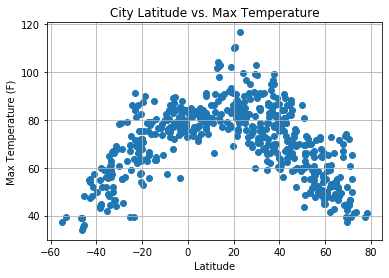

In [14]:
plt.scatter(clean_full_city_data['Lat'], clean_full_city_data['Max Temp'])
plt.grid()
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Max Temperature")
plt.savefig('../Images/Lat_vs_Temp.png')

<Figure size 432x288 with 0 Axes>

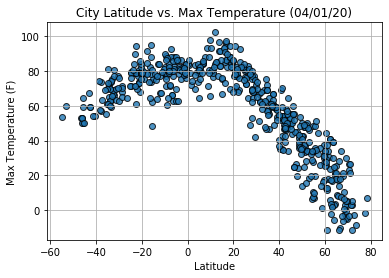

## Latitude vs. Humidity Plot

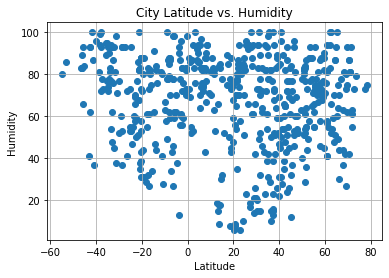

In [26]:
plt.scatter(clean_full_city_data['Lat'], clean_full_city_data['Humidity'])
plt.grid()
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Humidity")
plt.savefig('Lat_vs_Humid.png')

## Latitude vs. Cloudiness Plot

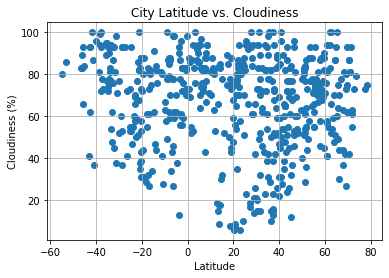

In [15]:
plt.scatter(clean_full_city_data['Lat'], clean_full_city_data['Cloudiness'])
plt.grid()
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Lat_vs_cloud.png')

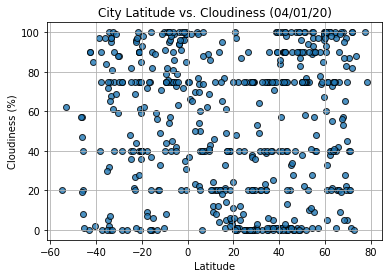

## Latitude vs. Wind Speed Plot

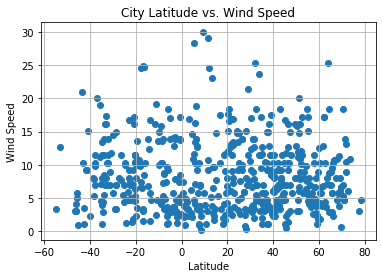

In [16]:
plt.scatter(clean_full_city_data['Lat'], clean_full_city_data['Wind Speed'])
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Lat_vs_wind.png')

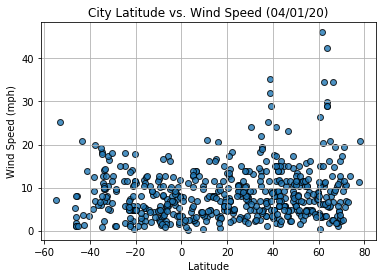

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

"""
city_slope, city_int, city_r, city_p, city_std_err = st.linregress(clean_full_city_data['Lat'], clean_full_city_data['Max Temp'])

city_lat_lreg = clean_full_city_data['Lat']

city_fit = city_slope * city_lat_lreg + city_int
"""

In [17]:
# Create Northern and Southern Hemisphere DataFrames

northern_fix_city_data = clean_full_city_data[clean_full_city_data.Lat >= 0]
northern_fix_city_data

southern_fix_city_data = clean_full_city_data[clean_full_city_data.Lat <= 0]
southern_fix_city_data

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
3            Hobart -42.88  147.33     55.40        93          93   
4       East London -33.02   27.91     66.76        62          62   
6        Bredasdorp -34.53   20.04     59.00        93          93   
7             Karoi -16.81   29.69     55.62        73          73   
8         Hithadhoo  -0.60   73.08     84.18        70          70   
..              ...    ...     ...       ...       ...         ...   
582          Nsanje -16.92   35.26     66.72        61          61   
586  Phuthaditjhaba -28.52   28.82     45.18        53          53   
595          Moroni -11.70   43.26     76.78        81          81   
597  Cap Malheureux -19.98   57.61     72.00        72          72   
603       Caravelas -17.71  -39.25     78.84        55          55   

     Wind Speed Country        Date  
3         10.29      AU  1592758754  
4         17.43      ZA  1592758877  
6          2.82      ZA  1592758696  
7          1.54      ZW  1592758877  
8          5.17      MV  1592758877  
..          ...     ...         ...  
582        2.98      MW  1592758952  
586        3.27      ZA  1592758952  
595       16.22      KM  1592758953  
597        8.01      MU  1592758953  
603        7.34      BR  1592758954  

[183 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

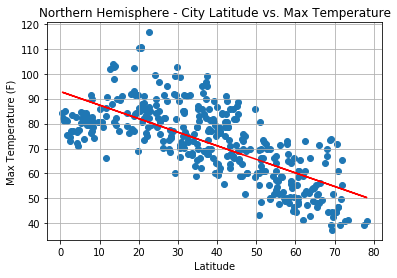

In [18]:
plt.scatter(northern_fix_city_data['Lat'], northern_fix_city_data['Max Temp'])
plt.grid()
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(northern_fix_city_data['Lat'], northern_fix_city_data['Max Temp'])

city_lat_linreg = northern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')
plt.savefig('N_Lat_vs_Temp.png')

The r-squared is: 0.8271188905041935


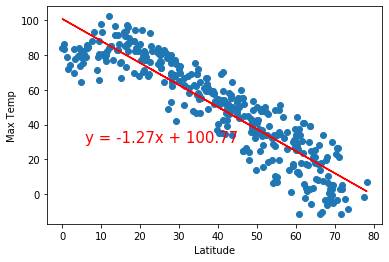

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

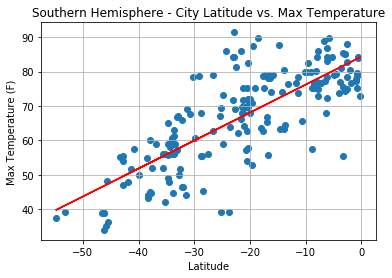

In [19]:
plt.scatter(southern_fix_city_data['Lat'], southern_fix_city_data['Max Temp'])
plt.grid()
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(southern_fix_city_data['Lat'], southern_fix_city_data['Max Temp'])

city_lat_linreg = southern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')

plt.savefig('S_Lat_vs_Temp.png')

The r-squared is: 0.39936284758885965


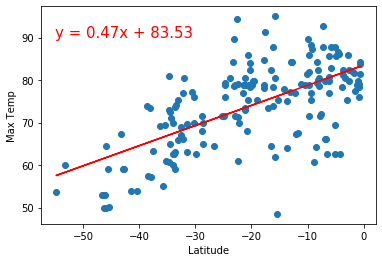

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

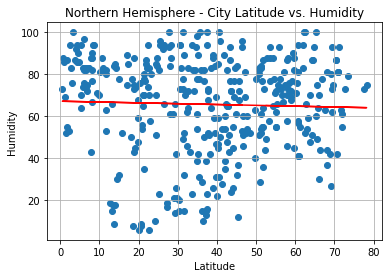

In [20]:
plt.scatter(northern_fix_city_data['Lat'], northern_fix_city_data['Humidity'])
plt.grid()
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - City Latitude vs. Humidity")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(northern_fix_city_data['Lat'], northern_fix_city_data['Humidity'])

city_lat_linreg = northern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')

plt.savefig('N_Lat_vs_Humid.png')

The r-squared is: 0.10829462153873139


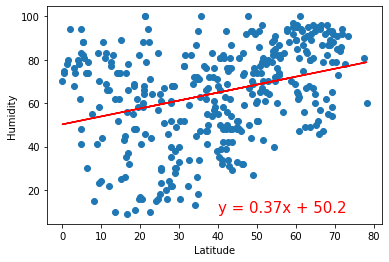

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

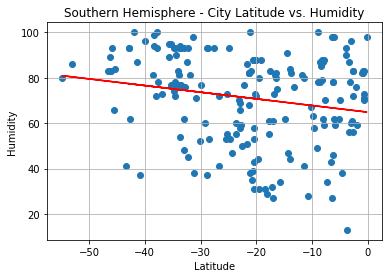

In [21]:
plt.scatter(southern_fix_city_data['Lat'], southern_fix_city_data['Humidity'])
plt.grid()
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - City Latitude vs. Humidity")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(southern_fix_city_data['Lat'], southern_fix_city_data['Humidity'])

city_lat_linreg = southern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')

plt.savefig('S_Lat_vs_Humid.png')

The r-squared is: 0.0008996079328825663


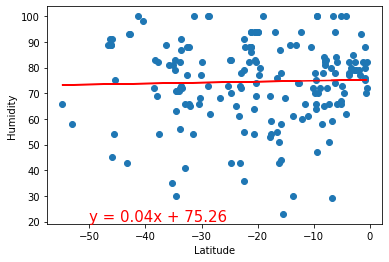

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

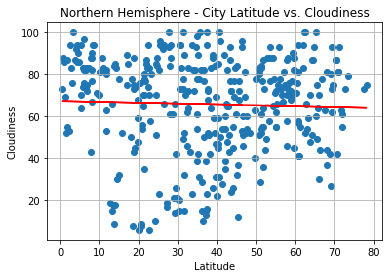

In [22]:
plt.scatter(northern_fix_city_data['Lat'], northern_fix_city_data['Cloudiness'])
plt.grid()
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(northern_fix_city_data['Lat'], northern_fix_city_data['Cloudiness'])

city_lat_linreg = northern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')

plt.savefig('N_Lat_vs_Cloud.png')

The r-squared is: 0.05768812657005063


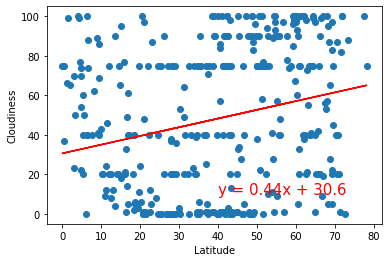

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

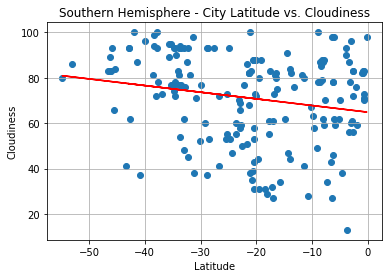

In [23]:
plt.scatter(southern_fix_city_data['Lat'], southern_fix_city_data['Cloudiness'])
plt.grid()
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(southern_fix_city_data['Lat'], southern_fix_city_data['Cloudiness'])

city_lat_linreg = southern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')

plt.savefig('S_Lat_vs_Cloud.png')

The r-squared is: 0.0684912094859049


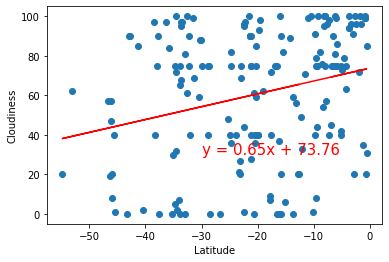

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

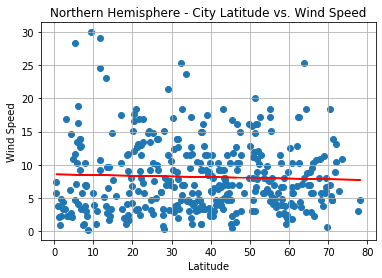

In [24]:
plt.scatter(northern_fix_city_data['Lat'], northern_fix_city_data['Wind Speed'])
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(northern_fix_city_data['Lat'], northern_fix_city_data['Wind Speed'])

city_lat_linreg = northern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')

plt.savefig('N_Lat_vs_Wind.png')

The r-squared is: 0.023371104533850804


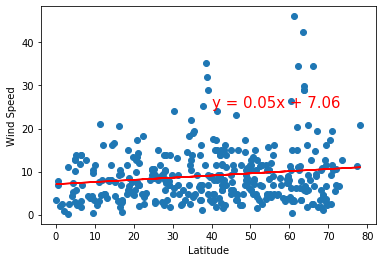

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

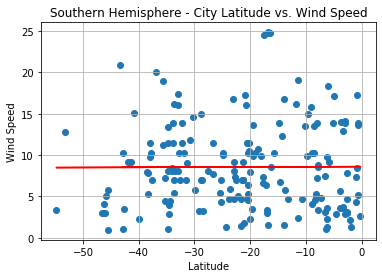

In [25]:
plt.scatter(southern_fix_city_data['Lat'], southern_fix_city_data['Wind Speed'])
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")

city_slope, city_int, city_r, city_p, city_std_err = st.linregress(southern_fix_city_data['Lat'], southern_fix_city_data['Wind Speed'])

city_lat_linreg = southern_fix_city_data['Lat']

city_fit = city_slope * city_lat_linreg + city_int

plt.plot(city_lat_linreg,city_fit,color='red')

plt.savefig('S_Lat_vs_Wind.png')

The r-squared is: 0.03381889207758188


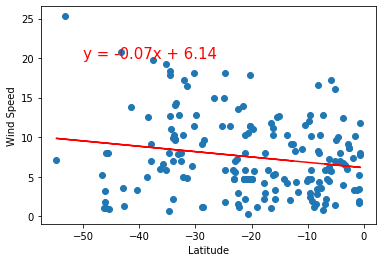